### OdontoVision: Detecção de Fraudes em Planos Odontológicos usando Random Forest
Este notebook implementa o projeto de detecção de fraudes em sinistros odontológicos usando Random Forest como modelo central. Exploramos a preparação dos dados, balanceamento, treinamento com hiperparâmetros otimizados, e avaliação final para maximizar a detecção de fraudes.

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [2]:

# Carregamento dos dados a partir do arquivo CSV
data = pd.read_csv('odonto_vision_data.csv')
data.head()


,paciente_id,dentista_id,num_consultas,procedimento_custo,idade_paciente,fraude
0,3732,476,2,1190,26,0
1,4264,375,1,1597,68,0
2,5859,123,5,1822,65,0
3,8891,240,8,1760,74,0
4,5373,455,3,1268,56,0


In [3]:

# Separação dos dados em variáveis independentes (X) e alvo (y)
X = data.drop('fraude', axis=1)
y = data['fraude']

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:

# Aplicação do SMOTE para balancear o conjunto de treinamento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Distribuição das classes após o balanceamento com SMOTE:")
print(y_train_bal.value_counts())


Distribuição das classes após o balanceamento com SMOTE:
fraude
0    423
1    423
Name: count, dtype: int64


In [6]:

# Configuração dos hiperparâmetros para busca em grade
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']  # Reponderação para priorizar a classe minoritária (fraude)
}

# GridSearchCV para encontrar os melhores hiperparâmetros com Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           scoring='recall', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_bal, y_train_bal)

# Exibindo os melhores hiperparâmetros
print("Melhores Hiperparâmetros:", grid_search.best_params_)
model_optimized = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores Hiperparâmetros: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


Acurácia: 0.5033333333333333
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       176
           1       0.40      0.40      0.40       124

    accuracy                           0.50       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.50      0.50       300



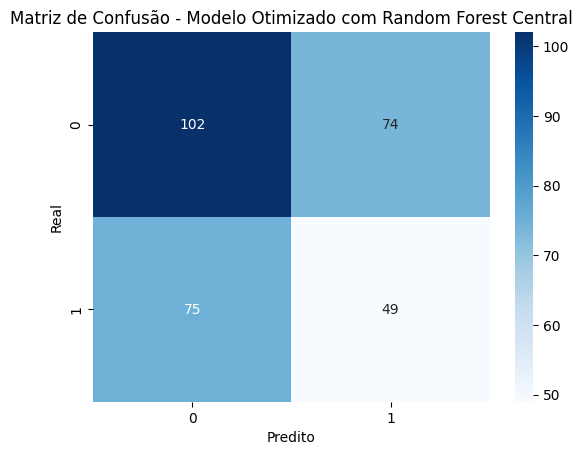

In [7]:

# Avaliação do modelo otimizado nos dados de teste
y_pred_optimized = model_optimized.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred_optimized))
print(classification_report(y_test, y_pred_optimized))

# Matriz de Confusão para o modelo otimizado
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Modelo Otimizado com Random Forest Central")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


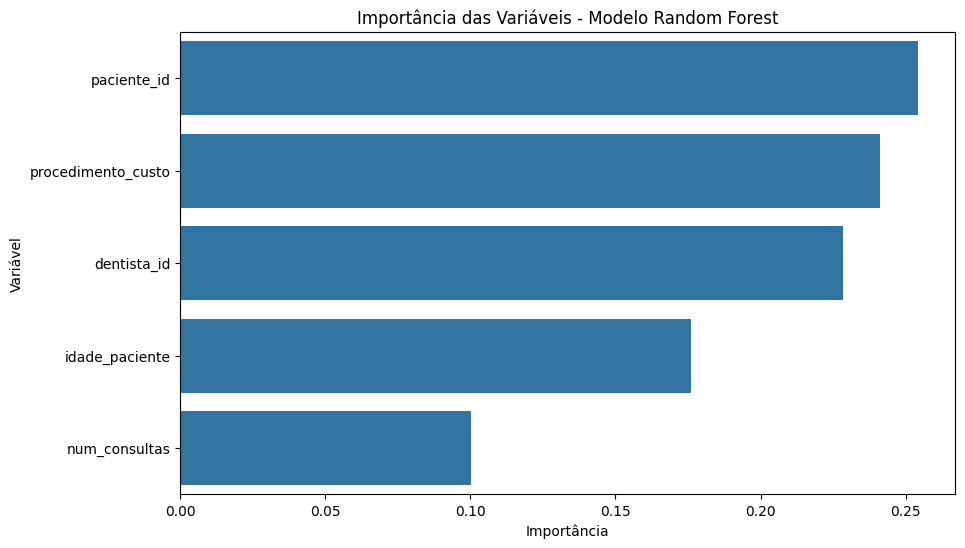

In [9]:
# Cálculo e visualização da importância das variáveis no modelo Random Forest
importances = model_optimized.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualização da importância das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importância das Variáveis - Modelo Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()
